<p style="font-size:200%;font-weight:bold">DEX Token</p>

- Author: Yichen Luo
- Date: 20220820

In [1]:
import threading
import requests
import pandas as pd
import os
import time
import numpy as np
# pd.set_option('display.precision', 8)
pd.set_option('max_colwidth', 100)
pd.set_option('display.max_columns', 100)
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
RD = '/home/team_defi/02_rdata/'
WD = '/home/team_defi/03_wdata/'
RES = '/home/team_defi/04_result/'

# Pancake Swap

In [94]:
df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn_without_lp.csv')
df['dex'].unique()
df.loc[df['dex'] == 'sushiswap_polygon']['insider_tokenSymbol'].unique()
df.loc[df['dex'] == 'sushiswap_polygon']

array(['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum',
       'pancake_binance', 'biswap_binance', 'apeswap_binance',
       'babyswap_binance', 'traderjoe_avalanche', 'pangolin_avalanche',
       'spookyswap_fantom', 'spiritswap_fantom', 'quickswap_polygon',
       'sushiswap_polygon'], dtype=object)

array(['$KMC', 'NXTT'], dtype=object)

id  \
14645  0xcc1a350f858ebaffde612b8d6fabce1493d59a927370b83d86e28fbe8f22696b-0   
14646  0xd902171b20ac33287a6b32e585f16fa4aaacad4397af2f61145e8200c354bbad-1   
14647  0x589df42bf6395f29325716e797d7fbbf606a429d7ea1ce4e4695a9877486f939-0   
14648  0xa24c13d2135b9075819d0a424ea06190535389180465ce7c78b101684beac9fa-1   
14649  0xd1a37ad33a3c47e15b02658b121a633e59894dbcb516bd95405cf9cbd26573ca-0   
...                                                                     ...   
14711  0x414080e642bc27ba3c910eba99e0612576b242a459bca9c8d516785d2d684edd-1   
14712  0xc36150d6f10ca9c6b8897ecfe3dcf5ccfcc2bc8fc921ff934a950b0c0bbd866d-0   
14713  0x12d95fd183eb494df56bfeb5e7b77de9954fa2b6c94943eb3c5c58ab2467d46b-0   
14714  0xff79e92bdd27b829bf4e23376ff6db6502f624e7d5578663a5cefff4c97f3ba3-0   
14715  0x9cf936f521778fd617200c952800b48a21045cb0aa267a485dff32d76732e6c9-0   

          amountUSD  logIndex origin recipient  \
14645  684.69606402       239    NaN       NaN   
14646  338.49605607        29    NaN       NaN   
14647  692.75220642       471    NaN       NaN   
14648  707.76531698       128    NaN       NaN   
14649   45.13375926       252    NaN       NaN   
...             ...       ...    ...       ...   
14711  677.27848253       399    NaN       NaN   
14712   44.53109491       324    NaN       NaN   
14713    2.40467095       421    NaN       NaN   
14714    7.92347244       152    NaN       NaN   
14715    7.92347244       229    NaN       NaN   

                                           sender sqrtPriceX96  tick  \
14645  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14646  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14647  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14648  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14649  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
...                                           ...          ...   ...   
14711  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14712  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14713  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14714  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   
14715  0x1b02da8cb0d097eb8d57a175b88c7d8b47997506          NaN   NaN   

                 timestamp     token0_name       token1_name  \
14645  2022-01-24 01:00:27  USD Coin (PoS)              $KMC   
14646  2022-01-10 17:10:26  USD Coin (PoS)              $KMC   
14647  2022-01-24 01:02:31  USD Coin (PoS)              $KMC   
14648  2022-01-16 18:13:40  USD Coin (PoS)              $KMC   
14649  2022-01-14 14:53:16   Wrapped Matic              $KMC   
...                    ...             ...               ...   
14711  2022-01-16 17:52:40  USD Coin (PoS)              $KMC   
14712  2022-01-14 13:51:02   Wrapped Matic              $KMC   
14713  2022-01-30 22:34:36  NextEarthToken  (PoS) Tether USD   
14714  2022-01-30 21:28:54   Wrapped Matic    NextEarthToken   
14715  2022-01-30 21:29:20   Wrapped Matic    NextEarthToken   

                                        token0_id  \
14645  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14646  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14647  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14648  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14649  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
...                                           ...   
14711  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14712  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
14713  0x374af2db27a0c655beba4323b4c4273dc30eba73   
14714  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
14715  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   

                                        token1_id  \
14645  0x44d09156c7b4acf0c64459fbcced7613f5519918   
14646  0x44d09156c7b4acf0c64459fbcced7613f5519918   
14647  0x44d09156c7b4acf0c64459fbcced7613f5519918   
14648  0x44d09156c7b4acf0c64459fbcced761

# Web Crawler

## List

In [29]:
# for idx, row in df.iterrows():
#     insider_tokenName = row['insider_tokenName']
#     insider_contractAddress = row['insider_contractAddress']
#     token0_name = row['token0_name']
#     token1_name = row['token1_name']
#     token0_id = row['token0_id']
#     token1_id = row['token1_id']
#     index = row['id']
    
#     if (insider_tokenName == token0_name)|(insider_contractAddress == token0_id):
#         df.loc[df['id'] == index, 'insider_token_id'] = token0_id
#     if (insider_tokenName == token1_name)|(insider_contractAddress == token1_id):
#         df.loc[df['id'] == index, 'insider_token_id'] = token1_id
        
# df.to_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn_token_id.csv', index=False)

In [99]:
# df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn_token_id.csv')
# lst = df.drop_duplicates('insider_token_id').loc[:, ['insider_token_id', 'dex', 'chain']]
# lst['status'] = -1
# lst.to_csv(f'{WD}dex_price/list/dex_list.csv', index=False)

In [186]:
# df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn_token_id.csv')
# lst1 = df.drop_duplicates('insider_token_id').loc[:, ['insider_token_id', 'dex', 'chain']]
# lst2 = df.drop_duplicates(['insider_token_id', 'dex']).loc[:, ['insider_token_id', 'dex', 'chain']]

array([['0x24e89bdf2f65326b94e36978a7edeac63623dafa',
        'uniswapv3_ethereum'],
       ['0x4ffcad848248d4931374336fcaccf263638413ae',
        'uniswapv3_ethereum'],
       ['0x6339bd92eaa3cb8e629b06449e08b90581a33cea',
        'uniswapv3_ethereum'],
       ...,
       ['0x374af2db27a0c655beba4323b4c4273dc30eba73',
        'quickswap_polygon'],
       ['0x87842ed511c255a06ae872e7ad83a64a1e3bd39c',
        'quickswap_polygon'],
       ['0x3e41ce4f7ef7ca7c23640d2c8a906552a2a90092',
        'quickswap_polygon']], dtype=object)

array([['0x24e89bdf2f65326b94e36978a7edeac63623dafa'],
       ['0x4ffcad848248d4931374336fcaccf263638413ae'],
       ['0x6339bd92eaa3cb8e629b06449e08b90581a33cea'],
       ...,
       ['0x3e41ce4f7ef7ca7c23640d2c8a906552a2a90092'],
       ['0x44d09156c7b4acf0c64459fbcced7613f5519918'],
       ['0x374af2db27a0c655beba4323b4c4273dc30eba73']], dtype=object)

In [115]:
# lst = pd.read_csv(f'{WD}dex_price/list/dex_list.csv')
# # lst.loc[(lst['dex'] == 'sushiswap_ethereum')|(lst['dex'] == 'babyswap_binance')|(lst['dex'] == 'pangolin_avalanche'), 'status'] = -1
# lst.loc[(lst['dex'] == 'sushiswap_ethereum')|(lst['dex'] == 'babyswap_binance')|(lst['dex'] == 'pangolin_avalanche')]
# # lst.to_csv(f'{WD}dex_price/list/dex_list.csv', index=False)

## Web Crawler

In [182]:
lst = pd.read_csv(f'{WD}dex_price/list/dex_list.csv')
done = lst.loc[lst['status'] != -1].shape[0]
todo = lst.loc[lst['status'] == -1].shape[0]
total = lst.shape[0]

for idx, row in lst.loc[lst['status'] == -1].iterrows():
    try:
        time.sleep(2)
        
        insider_token_id = row['insider_token_id']
        dex = row['dex']

        if dex == 'uniswapv3_ethereum':
            url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswap-v3-subgraph'
            post = {"query": f"query manyTokens($lastID: String) {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    close\n    date\n    feesUSD\n    high\n    id\n    low\n    open\n    priceUSD\n    totalValueLocked\n    totalValueLockedUSD\n    untrackedVolumeUSD\n    volume\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      feesUSD\n      id\n      name\n      poolCount\n      symbol\n      totalSupply\n      totalValueLocked\n      totalValueLockedUSD\n      totalValueLockedUSDUntracked\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}
        
        if dex == 'uniswapv2_ethereum':
#             url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
#             post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{id_gt: \"{insider_token_id}\"}}\n  ) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      tradeVolume\n      totalSupply\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
            url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(where: {{id_gte: \"{insider_token_id}\"}}) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeUSD\n    dailyVolumeToken\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n      txCount\n    }}\n  }}\n}}"}

        if dex == 'sushiswap_ethereum':
            url = 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}
        
        if dex == 'pancake_binance':
            continue
            
        if dex == 'biswap_binance':
            url = 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeBNB\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityBNB\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedBNB\n      derivedUSD\n      id\n      name\n      symbol\n      totalLiquidity\n      totalTransactions\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
        
        if dex == 'apeswap_binance':
            url = 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

        if dex == 'babyswap_binance':
            url = 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      derivedUSD\n      id\n      name\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            
        if dex == 'jetswap_binance':
            url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

        if dex == 'traderjoe_avalanche':
            url = 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityAVAX\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeAVAX\n    volumeUSD\n    token {{\n      decimals\n      derivedAVAX\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

        if dex == 'pangolin_avalanche':
            url = 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

        if dex == 'spookyswap_fantom':
            url = 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

        if dex == 'spiritswap_fantom':
            url = 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeFTM\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    maxStored\n    priceUSD\n    totalLiquidityFTM\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedFTM\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

        if dex == 'quickswap_polygon':
            continue
            
        if dex == 'sushiswap_polygon':
            url = 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

        if dex == 'apeswap_polygon':
            url = 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
        
        if dex == 'jetswap_polygon':
            url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2'
            post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeToken\n    dailyVolumeETH\n    dailyVolumeUSD\n    id\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            
        r = requests.post(url, json=post)
        data = r.json()

        df = pd.DataFrame.from_dict(data['data']['tokenDayDatas'])
        for key in list(data['data']['tokenDayDatas'][0]['token']):
            df[f'token_{key}'] = df['token'].apply(lambda x: x[key])
        df.drop(columns='token', inplace=True)
        df = df.loc[df['token_id'] == insider_token_id]


        df['date'] = pd.to_datetime(df['date'], unit='s', origin='unix')
        
        df.to_csv(f'{WD}dex_price/csv/{insider_token_id}.csv', index=False)
        
        done += 1
        if df.shape[0] == 1000: 
            lst.loc[lst['insider_token_id'] == insider_token_id, 'status'] = 2
            print(f'{insider_token_id}, {dex} more than 1000, {done}/{total}')
        else:
            lst.loc[lst['insider_token_id'] == insider_token_id, 'status'] = 1
            print(f'{insider_token_id}, {dex} done, {done}/{total}')
        lst.to_csv(f'{WD}dex_price/list/dex_list.csv', index=False)
    
    except Exception as e:
        print(f'{insider_token_id}, {dex} Error{e}, {done}/{total}')
        time.sleep(5)
    

# Debug

In [93]:
pd.read_csv(f'{WD}dex_price/list/dex_list.csv')['dex'].unique()
df = pd.read_csv(f'{RES}/insider_trading/token_related_txn/token_related_txn_token_id.csv')
df.loc[df['dex'] == 'quickswap_polygon']

array(['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum',
       'pancake_binance', 'biswap_binance', 'apeswap_binance',
       'babyswap_binance', 'traderjoe_avalanche', 'pangolin_avalanche',
       'spookyswap_fantom', 'quickswap_polygon'], dtype=object)

id  \
14244  0xd46e06352ff371e4c3905032506f9da07d6c44cb078f03fcbe6b792d8283e010-0   
14245  0xc6163d190aed58fc7bdde3d598e0fe7dbda9d1758c0c5d06e67d9a7988ac0356-2   
14246  0xb3f34ff32d7d553d893947dc15f7a6a72fa7bd9cba704812100626ed9a110333-2   
14247  0xb63a329cfa37a30cdedf0af63c071052823abda1194d2dcd126d5cae2cefb888-0   
14248  0x3f6668d8bef7fc26868d3c8f3626df1ec18132713a3cb5e5e403a53b3dd57049-0   
...                                                                     ...   
14640  0x1f46f617f70e916e291ded13c824ca6b4fee878e3c2b925c35a5b31625eb0872-0   
14641  0x62a09a784925ae78ca7fd930efc7b46ec58355746a49aaa1c08676ea2d78ff97-0   
14642  0xad02a918deca508b17e306528f337d4b4b1e8f7ae88df9064c3d463df54b674a-0   
14643  0xbc31c6a1efe848115673663ee83dd0569e75a0f34e6fc57ddc8a289c833ba568-0   
14644  0x97130fdf02080ec550dab69f0ff68a261727be06474d0a3902bb69d1660e36ef-0   

           amountUSD  logIndex origin recipient  \
14244     1.21230048       384    NaN       NaN   
14245    12.07471254       976    NaN       NaN   
14246    10.78430269      1609    NaN       NaN   
14247   712.20382400       317    NaN       NaN   
14248  2200.00000000       105    NaN       NaN   
...              ...       ...    ...       ...   
14640     0.03020600       733    NaN       NaN   
14641     0.03000000       590    NaN       NaN   
14642    74.46957059       448    NaN       NaN   
14643   111.77686251       536    NaN       NaN   
14644    29.70219820       176    NaN       NaN   

                                           sender sqrtPriceX96  tick  \
14244  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14245  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14246  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14247  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14248  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
...                                           ...          ...   ...   
14640  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14641  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14642  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14643  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   
14644  0xa5e0829caced8ffdd4de3c43696c57f7d7a678ff          NaN   NaN   

                 timestamp            token0_name            token1_name  \
14244  2021-10-14 17:13:41          Wrapped Matic  TrustSwap Token (PoS)   
14245  2021-11-03 14:41:59  TrustSwap Token (PoS)          Wrapped Ether   
14246  2021-11-16 15:02:22  TrustSwap Token (PoS)          Wrapped Ether   
14247  2021-12-11 05:15:00         USD Coin (PoS)                   $KMC   
14248  2021-12-11 21:21:24         USD Coin (PoS)                   $KMC   
...                    ...                    ...                    ...   
14640  2022-01-30 18:23:58         USD Coin (PoS)                 Dogioh   
14641  2022-01-30 18:23:02         USD Coin (PoS)                 Dogioh   
14642  2022-04-07 11:15:48          Wrapped Matic                   POKI   
14643  2022-04-07 11:17:36          Wrapped Matic                   POKI   
14644  2022-04-07 11:00:06          Wrapped Matic                   POKI   

                                        token0_id  \
14244  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
14245  0x3809dcdd5dde24b37abe64a5a339784c3323c44f   
14246  0x3809dcdd5dde24b37abe64a5a339784c3323c44f   
14247  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14248  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
...                                           ...   
14640  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14641  0x2791bca1f2de4661ed88a30c99a7a9449aa84174   
14642  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
14643  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   
14644  0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270   

                                        token1_id  \
14244  0x3809dcdd5dde24b37abe64a5a339784c33

In [206]:
insider_token_id = '0x0000000000004946c0e9f43f4dee607b0ef1fa1c'
url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2'
post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeToken\n    dailyVolumeETH\n    dailyVolumeUSD\n    id\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
r = requests.post(url, json=post)
data = r.json()

## Sample

6

dailyTxns dailyVolumeToken dailyVolumeETH dailyVolumeUSD  \
0         2                0              0              0   
1         1                0              0              0   
2         1                0              0              0   
3         1                0              0              0   
4         2                0              0              0   
5         5              542              0              0   

                                                 id       date priceUSD  \
0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18857 2021-08-18        0   
1  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18865 2021-08-26        0   
2  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18871 2021-09-01        0   
3  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18943 2021-11-12        0   
4  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18945 2021-11-14        0   
5  0x0000000000004946c0e9f43f4dee607b0ef1fa1c-18949 2021-11-18        0   

  totalLiquidityETH totalLiquidityToken totalLiquidityUSD token_decimals  \
0                 0                   1                 0              0   
1                 0                1001                 0              0   
2                 0                   2                 0              0   
3                 0                   3                 0              0   
4                 0                 721                 0              0   
5                 0                   4                 0              0   

  token_derivedETH                                    token_id  \
0                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   
1                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   
2                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   
3                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   
4                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   
5                0  0x0000000000004946c0e9f43f4dee607b0ef1fa1c   

              token_name token_symbol token_totalLiquidity token_totalSupply  \
0  Chi Gastoken by 1inch          CHI                    4             14440   
1  Chi Gastoken by 1inch          CHI                    4             14440   
2  Chi Gastoken by 1inch          CHI                    4             14440   
3  Chi Gastoken by 1inch          CHI                    4             14440   
4  Chi Gastoken by 1inch          CHI                    4             14440   
5  Chi Gastoken by 1inch          CHI                    4             14440   

  token_tradeVolume token_tradeVolumeUSD token_txCount  \
0               542                    0            12   
1               542                    0            12   
2               542                    0            12   
3               542                    0            12   
4               542                    0            12   
5               542                    0            12   

  token_untrackedVolumeUSD  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
5                        0

<AxesSubplot:xlabel='date'>

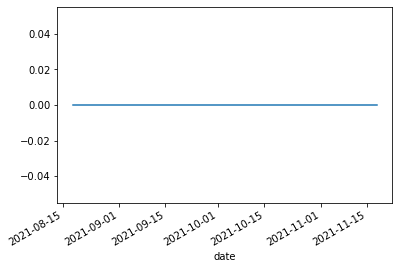

In [207]:
df = pd.DataFrame.from_dict(data['data']['tokenDayDatas'])

for key in list(data['data']['tokenDayDatas'][0]['token']):
    df[f'token_{key}'] = df['token'].apply(lambda x: x[key])
    

df.drop(columns='token', inplace=True)

df.shape[0]
test = df.loc[df['token_id'] == insider_token_id]

test['date'] = pd.to_datetime(test['date'], unit='s', origin='unix')
test

test.sort_values('date', ascending=True).set_index('date')['priceUSD'].astype('float').plot()

## Manual Opearation

In [175]:
insider_token_id = '0xc71d058add410f3e20ecfc3e38288d56f3ef04c8'
dft = pd.read_csv(f'{WD}dex_price/csv/{insider_token_id}.csv')
dft

id  dailyTxns  \
0   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19055        718   
1   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19056        205   
2   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19057        121   
3   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19058         52   
4   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19059         35   
5   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19060         25   
6   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19061         29   
7   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19062         22   
8   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19063         26   
9   0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19064         13   
10  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19065         14   
11  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19066          5   
12  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19067         12   
13  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19068         22   
14  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19069         45   
15  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19070         33   
16  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19071         47   
17  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19072         73   
18  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19073         29   
19  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19074         31   
20  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19075         23   
21  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19076         11   
22  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19077         24   
23  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19078         19   
24  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19079          5   
25  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19080         21   
26  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19081         16   
27  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19082          3   
28  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19083          6   
29  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19084         15   
30  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19085          9   
31  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19086         31   
32  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19087          1   
33  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19091          4   
34  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19092          1   
35  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19135          3   
36  0xc71d058add410f3e20ecfc3e38288d56f3ef04c8-19198          6   

    dailyVolumeETH   dailyVolumeUSD  dailyVolumeToken        date    priceUSD  \
0      92.47625226  251551.27808865    2.63277456e+11  2022-03-04  0.00000059   
1      28.32325516   74995.58002570    7.47334721e+10  2022-03-05  0.00000095   
2      30.16992217   79966.88304718    6.94345855e+10  2022-03-06  0.00000088   
3       8.50805274   21589.76163349    1.77708864e+10  2022-03-07  0.00000113   
4       4.52973375   11608.81451125    1.02864823e+10  2022-03-08  0.00000085   
5       2.16728134    5909.09426539    5.86250941e+09  2022-03-09  0.00000100   
6       2.66415955    6933.95238953    9.42360521e+09  2022-03-10  0.00000059   
7       2.60521676    6723.90611611    9.41574841e+09  2022-03-11  0.00000075   
8       2.46447456    6367.99373626    7.47206372e+09  2022-03-12  0.00000083   
9       0.81488071    2100.61745934    2.75660270e+09  2022-03-13  0.00000070   
10      1.07423162    2765.80627103    3.88188461e+09  2022-03-14  0.00000069   
11      0.74805619    1941.97683650    2.56734487e+09  2022-03-15  0.00000080   
12      1.09464462    2938.05117557    3.37064190e+09  2022-03-16  0.00000091   
13      3.70591544   10354.31407856    9.98779586e+09  2022-03-17  0.00000128   
14      9.48446004   27002.55160959    1.52043531e+10  2022-03-18  0.00000171   
15      5.34540940   15783.29789014    8.63026496e+09  2022-03-19  0.00000172   
16      8.29749523   24011.49159514    1.12636629e+10  2022-03-20  0.00000225   
17     18.93128666   55029.48345483    1.8455

In [176]:
n = 19198
dfs = []

while True:
    n += 1
    url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
    post = {"query": f"query MyQuery {{\n  tokenDayData(id: \"{insider_token_id}-{str(n)}\") {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
    r = requests.post(url, json=post)
    data = r.json()

    if data['data']['tokenDayData'] == None: break
    
    df = pd.DataFrame([[data['data']['tokenDayData'][i] for i in list(data['data']['tokenDayData'])]], columns=list(data['data']['tokenDayData']))

    for key in list(data['data']['tokenDayData']['token']):
        df[f'token_{key}'] = df['token'].apply(lambda x: x[key])


    df.drop(columns='token', inplace=True)
    test = df.loc[df['token_id'] == insider_token_id]

    test['date'] = pd.to_datetime(test['date'], unit='s', origin='unix')
    dfs.append(test)
    
dfs = pd.concat(dfs)
dfs

ValueError: No objects to concatenate

In [148]:
dfs = pd.concat(dfs)
dfs

id dailyTxns  \
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18622      1383   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18623      1305   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18624      1274   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18625      1124   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18626      2005   
..                                               ...       ...   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19221       185   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19222       228   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19223       311   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19224       194   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19225        52   

                         dailyVolumeETH            dailyVolumeToken  \
0   1321232.487130577010383274357621147  1332262.829011155597781003   
0   2237146.431767398911663047951949582  2254655.124491570691648632   
0   2421915.967209052621168906440334367  2432555.395352940321877044   
0   1955325.977759221647401326025639869  1958182.903388955305665824   
0   3843203.063130354223357335119795102  3865526.009267256058813452   
..                                  ...                         ...   
0   175294.8764871933671793556999412475   175699.116226152568337609   
0   219448.9803957086500284835744285595   219757.902622750831916834   
0   351858.3383505381036699172574555123   352465.074622021400382765   
0    145364.485258489936190797479050951   145539.547515202458551924   
0   5144.564965826234683488195758011974     5038.607099594380720604   

                         dailyVolumeUSD       date  \
0   4624667.447280507122323176967811019 2020-12-26   
0   8068326.134503678153888872577759088 2020-12-27   
0   9197075.540184944870189242252096573 2020-12-28   
0   7056443.838291600630943411920137939 2020-12-29   
0   15506175.19420703336349735704901843 2020-12-30   
..                                  ...        ...   
0   1421009.608655907469128228960742153 2022-08-17   
0   1740819.729228600657504999532210577 2022-08-18   
0   2519248.558101054750412457078079054 2022-08-19   
0   1028429.076505938999009055260049762 2022-08-20   
0   35543.05968570579569016495127432424 2022-08-21   

                               priceUSD                    totalLiquidityETH  \
0   3.394639429627240822838521844302485  44154.17369772460671095924569430576   
0   3.614124641979667359789094794495482  44073.77060471817860961130176918821   
0   3.731817079027796138298536450195115  43148.93890073367772366336118802915   
0   3.672428005841091576760698920763922  42333.28227726811776796247846098025   
0   4.146383695488457153600136604437566  45974.34956296098201660903405152545   
..                                  ...                                  ...   
0   7.911940134694808287017747551739001  6805.977185303525800476524767155991   
0   7.621615255553111341282682119149135  6644.293472880532559153788850128742   
0    6.90505515316990572279732176384184  6781.763967085117985411033186232289   
0   6.993768704498959666380226880681759  6912.244026290723380225600153162815   
0   7.033046882485660509306058914206839  6916.763001177771879291814651019789   

           totalLiquidityToken                    totalLiquidityUSD  \
0   8250467.040851430538441396  28007360.72971424957235361877766238   
0   8335631.712630872943223361  30126011.97908641515353108078835907   
0   8438761.324653546636665804   31491913.6371813340734808656168746   
0   8446522.183145194131845987  31019244.61734044857211867728377331   
0   8324969.552046135904442321  34518518.01604194273313397768990216   
..                         ...                                  ...   
0    1574316.78223376544481702  12455900.13407891533947727769510006   
0   1612506.028136569686377889  12289900.54371703411711731290864352   
0   1583340.145525711123936818  10933051.03108310004218890935299123   
0   1556537.618395748363085526  10886064.08291152907918979611654993   
0    1555494.

In [149]:
df = []
df.append(dft)
df.append(dfs)
df = pd.concat(df)
df

id dailyTxns  \
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18522     71138   
1   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18523     45435   
2   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18524     24675   
3   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18525     16802   
4   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-18526     11718   
..                                               ...       ...   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19221       185   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19222       228   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19223       311   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19224       194   
0   0x1f9840a85d5af5bf1d1762f925bdaddc4201f984-19225        52   

                         dailyVolumeETH                       dailyVolumeUSD  \
0                     78017337.01560989                   237921027.06900916   
1                     43764655.04790837                   248929997.72389251   
2                     21558844.10809487                   139738230.76674286   
3                     15834236.57924665                    85772904.23507559   
4                     12467455.59546436                     58809614.5377963   
..                                  ...                                  ...   
0   175294.8764871933671793556999412475  1421009.608655907469128228960742153   
0   219448.9803957086500284835744285595  1740819.729228600657504999532210577   
0   351858.3383505381036699172574555123  2519248.558101054750412457078079054   
0    145364.485258489936190797479050951  1028429.076505938999009055260049762   
0   5144.564965826234683488195758011974  35543.05968570579569016495127432424   

             dailyVolumeToken                 date  \
0           78317052.63288957           2020-09-17   
1           44244120.76846786           2020-09-18   
2           21938694.74269769           2020-09-19   
3           16149127.15456286           2020-09-20   
4           12624864.49625179           2020-09-21   
..                        ...                  ...   
0   175699.116226152568337609  2022-08-17 00:00:00   
0   219757.902622750831916834  2022-08-18 00:00:00   
0   352465.074622021400382765  2022-08-19 00:00:00   
0   145539.547515202458551924  2022-08-20 00:00:00   
0     5038.607099594380720604  2022-08-21 00:00:00   

                               priceUSD                    totalLiquidityETH  \
0                            3.47134757                       37796.96542699   
1                            6.79476422                       62304.39655121   
2                            5.64169596                       72757.20428237   
3                            5.21730232                       73618.13506293   
4                            4.26132865                       72222.88743224   
..                                  ...                                  ...   
0   7.911940134694808287017747551739001  6805.977185303525800476524767155991   
0   7.621615255553111341282682119149135  6644.293472880532559153788850128742   
0    6.90505515316990572279732176384184  6781.763967085117985411033186232289   
0   6.993768704498959666380226880681759  6912.244026290723380225600153162815   
0   7.033046882485660509306058914206839  6916.763001177771879291814651019789   

           totalLiquidityToken                    totalLiquidityUSD  \
0             4217540.27571154                    14640548.20545701   
1             3488225.96420973                    23701672.95952343   
2             4939143.71515979                    27865147.14809706   
3             5206572.80883863                    27164264.39126565   
4             5781328.12903475                    24636139.21703212   
..                         ...                                  ...   
0    1574316.78223376544481702  12455900.13407891533947727769510006   
0   1612506.028136569686377889  12289900.54371703411711731290864352   
0   1583340.145525711123936818  10933051.031083

<AxesSubplot:xlabel='date'>

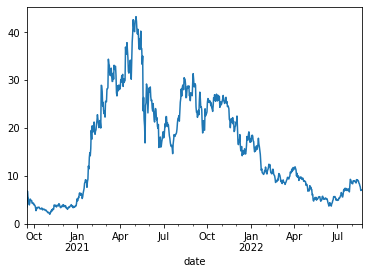

In [151]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', ascending=True).set_index('date')['priceUSD'].astype('float').plot()

In [153]:
# df.to_csv(f'{WD}dex_price/csv/{insider_token_id}.csv')

# More than 1,000

In [179]:
lst = pd.read_csv(f'{WD}dex_price/list/dex_list.csv')
lst.loc[lst['status'] == 2]

Empty DataFrame
Columns: [insider_token_id, dex, chain, status]
Index: []

# All Tokens

In [211]:
dfs = []
chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
         'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
         'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
         'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
         'polygon':['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']}
for chain in chains:
    df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
    df['chain'] = chain
    for dex in dexes[chain]:
        df[dex] = -1
    dfs.append(df)

dfs = pd.concat(dfs)
dfs['status'] = -1
dfs

dfs.to_csv(f'{WD}dex_price/list/dex_list_total.csv')

root       tokenName tokenSymbol  \
0   0x742025b32fdda654df1aa5ae348928331ff05062        Callisto       C3000   
1   0xef0121d57d9e4324c3de83cf2a686ff5ac13c3a4        Callisto       C3000   
2   0xa625141e73ab1af1b57efbbad9ba9ab8813393e3            SYNC        SYNC   
3   0x6e86c831b85cc37f0aeeb5d553c40b257af8fb42  t.me/skin_port    SKINPORT   
4   0x72969afa049fa40e808d42f807ef4640a7cac5ec    KING VITALIK   KING ????   
..                                         ...             ...         ...   
24  0x4dbe648f797e7ec51da3eae23a89b971b4e022a5     Chihiro Inu       CHIRO   
25  0x5a6dc942826807539ca19d21c132e4b004075de0  NextEarthToken        NXTT   
26  0x3030f09fe7ea8fa6762c13d12afa8541cb2c6644          Dogioh         DGH   
27  0x81411b800dcc935e1aaf0ed01dd1c0777236153c            POKI        POKI   
28  0xadc42c844b8392ca353e079030609b6303d7f51d            Poge        Poge   

                               contractAddress     chain  uniswapv3_ethereum  \
0   0x2a15de7c821baa1a727039b76d540b36b23db257  ethereum                -1.0   
1   0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb  ethereum                -1.0   
2   0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32  ethereum                -1.0   
3   0x506d62bf7d8a8f444f13533081dc03470483f4ea  ethereum                -1.0   
4   0xcbfb937a75f8baf9d94e064cc90b1c045f7c25fa  ethereum                -1.0   
..                                         ...       ...                 ...   
24  0x35156b404C3f9bdaf45ab65Ba315419bcDe3775c   polygon                 NaN   
25  0x0d0B8488222F7f83B23E365320a4021b12eAD608   polygon                 NaN   
26  0x87842eD511C255a06aE872E7Ad83a64a1e3bD39c   polygon                 NaN   
27  0x3E41CE4f7ef7ca7C23640d2C8a906552a2A90092   polygon                 NaN   
28  0x6EA856c7A96d7366De2bbB600B956617d344DDa4   polygon                 NaN   

    uniswapv2_ethereum  sushiswap_ethereum  pancake_binance  biswap_binance  \
0                 -1.0                -1.0              NaN             NaN   
1                 -1.0                -1.0              NaN             NaN   
2                 -1.0                -1.0              NaN             NaN   
3                 -1.0                -1.0              NaN             NaN   
4                 -1.0                -1.0              NaN             NaN   
..                 ...                 ...              ...             ...   
24                 NaN                 NaN              NaN             NaN   
25                 NaN                 NaN              NaN             NaN   
26                 NaN                 NaN              NaN             NaN   
27                 NaN                 NaN              NaN             NaN   
28                 NaN                 NaN              NaN             NaN   

    apeswap_binance  babyswap_binance  jetswap_binance  traderjoe_avalanche  \
0               NaN               NaN              NaN                  NaN   
1               NaN               NaN              NaN                  NaN   
2               NaN               NaN              NaN                  NaN   
3               NaN               NaN              NaN                  NaN   
4               NaN               NaN              NaN                  NaN   
..              ...               ...              ...                  ...   
24              NaN               NaN              NaN                  NaN   
25              NaN               NaN              NaN                  NaN   
26              NaN               NaN              NaN                  NaN   
27              NaN               NaN              NaN                  NaN   
28              NaN               NaN              NaN                  NaN   

    pangolin_avalanche  spookyswap_fantom  spiritswap_fantom  \
0                  NaN                NaN                NaN   
1                  NaN                NaN                NaN   
2                  NaN                NaN             

In [214]:
lst = pd.read_csv(f'{WD}dex_price/list/dex_list_total.csv')
dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
         'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
         'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
         'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
         'polygon':['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']}

done = lst.loc[lst['status'] != -1].shape[0]
todo = lst.loc[lst['status'] == -1].shape[0]
total = lst.shape[0]

for idx, row in lst.loc[lst['status'] == -1].iterrows():
        done += 1
        
        insider_token_id = row['contractAddress']
        chain = row['chain']
        
        for dex in dexes[chain]:
            
            try:
                if dex == 'uniswapv3_ethereum':
                    url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswap-v3-subgraph'
                    post = {"query": f"query manyTokens($lastID: String) {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    close\n    date\n    feesUSD\n    high\n    id\n    low\n    open\n    priceUSD\n    totalValueLocked\n    totalValueLockedUSD\n    untrackedVolumeUSD\n    volume\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      feesUSD\n      id\n      name\n      poolCount\n      symbol\n      totalSupply\n      totalValueLocked\n      totalValueLockedUSD\n      totalValueLockedUSDUntracked\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

                if dex == 'uniswapv2_ethereum':
                    url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{id_gt: \"{insider_token_id}\"}}\n  ) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      tradeVolume\n      totalSupply\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
                    # url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
                    # post = {"query": f"query MyQuery {{\n  tokenDayDatas(where: {{id_gte: \"{insider_token_id}\"}}) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeUSD\n    dailyVolumeToken\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n      txCount\n    }}\n  }}\n}}"}

                if dex == 'sushiswap_ethereum':
                    url = 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

                if dex == 'pancake_binance':
                    continue

                if dex == 'biswap_binance':
                    url = 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeBNB\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityBNB\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedBNB\n      derivedUSD\n      id\n      name\n      symbol\n      totalLiquidity\n      totalTransactions\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'apeswap_binance':
                    url = 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'babyswap_binance':
                    url = 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      derivedUSD\n      id\n      name\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}


                if dex == 'jetswap_binance':
                    url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'traderjoe_avalanche':
                    url = 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityAVAX\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeAVAX\n    volumeUSD\n    token {{\n      decimals\n      derivedAVAX\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

                if dex == 'pangolin_avalanche':
                    url = 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'spookyswap_fantom':
                    url = 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

                if dex == 'spiritswap_fantom':
                    url = 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeFTM\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    maxStored\n    priceUSD\n    totalLiquidityFTM\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedFTM\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'quickswap_polygon':
                    continue

                if dex == 'sushiswap_polygon':
                    url = 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

                if dex == 'apeswap_polygon':
                    url = 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

                if dex == 'jetswap_polygon':
                    url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2'
                    post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token_contains: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeToken\n    dailyVolumeETH\n    dailyVolumeUSD\n    id\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}


                r = requests.post(url, json=post)
                data = r.json()

                df = pd.DataFrame.from_dict(data['data']['tokenDayDatas'])
                for key in list(data['data']['tokenDayDatas'][0]['token']):
                    df[f'token_{key}'] = df['token'].apply(lambda x: x[key])
                df.drop(columns='token', inplace=True)
                df = df.loc[df['token_id'] == insider_token_id]


                df['date'] = pd.to_datetime(df['date'], unit='s', origin='unix')

                df.to_csv(f'{WD}dex_price/csv_total/{insider_token_id}_{dex}.csv', index=False)

                
                if df.shape[0] == 1000: 
                    lst.loc[lst['contractAddress'] == insider_token_id, 'dex'] = 2
                    print(f'{insider_token_id}, {dex} more than 1000, {done}/{total}')
                else:
                    lst.loc[lst['contractAddress'] == insider_token_id, 'dex'] = 1
                    print(f'{insider_token_id}, {dex} done, {done}/{total}')
                

            except Exception as e:
                print(f'{insider_token_id}, {dex} Error{e}, {done}/{total}')
                
        lst.loc[lst['contractAddress'] == insider_token_id, 'status'] = 1        
        lst.to_csv(f'{WD}dex_price/list/dex_list_total.csv', index=False)

0x2a15de7c821baa1a727039b76d540b36b23db257, uniswapv3_ethereum Errorlist index out of range, 1/14807
0x2a15de7c821baa1a727039b76d540b36b23db257, uniswapv2_ethereum done, 1/14807
0x2a15de7c821baa1a727039b76d540b36b23db257, sushiswap_ethereum Errorlist index out of range, 1/14807
0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb, uniswapv3_ethereum Errorlist index out of range, 2/14807
0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb, uniswapv2_ethereum done, 2/14807
0xa0fd12272cc4da86aebf9d592cdad253cbbc25fb, sushiswap_ethereum Errorlist index out of range, 2/14807
0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32, uniswapv3_ethereum done, 3/14807
0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32, uniswapv2_ethereum done, 3/14807
0xb6ff96b8a8d214544ca0dbc9b33f7ad6503efd32, sushiswap_ethereum done, 3/14807
0x506d62bf7d8a8f444f13533081dc03470483f4ea, uniswapv3_ethereum Errorlist index out of range, 4/14807
0x506d62bf7d8a8f444f13533081dc03470483f4ea, uniswapv2_ethereum done, 4/14807
0x506d62bf7d8a8f444f13533081dc034

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



0x8b19627fc2D732A2D96E7fE024c37cB672590A30, uniswapv2_ethereum done, 4725/14807
0x8b19627fc2D732A2D96E7fE024c37cB672590A30, sushiswap_ethereum Errorlist index out of range, 4725/14807
0x96de5B6bF31A1137A7b77a77db04e0E493Ec1e7D, uniswapv3_ethereum Errorlist index out of range, 4726/14807
0x96de5B6bF31A1137A7b77a77db04e0E493Ec1e7D, uniswapv2_ethereum done, 4726/14807
0x96de5B6bF31A1137A7b77a77db04e0E493Ec1e7D, sushiswap_ethereum Errorlist index out of range, 4726/14807
0xF14d68EcD0e124f96Dd87044938Ba43448B2a1E4, uniswapv3_ethereum Errorlist index out of range, 4727/14807
0xF14d68EcD0e124f96Dd87044938Ba43448B2a1E4, uniswapv2_ethereum done, 4727/14807
0xF14d68EcD0e124f96Dd87044938Ba43448B2a1E4, sushiswap_ethereum Errorlist index out of range, 4727/14807
0x4be04F4F9B5Ffc983303DDBb79e628D2e3829672, uniswapv3_ethereum Errorlist index out of range, 4728/14807
0x4be04F4F9B5Ffc983303DDBb79e628D2e3829672, uniswapv2_ethereum done, 4728/14807
0x4be04F4F9B5Ffc983303DDBb79e628D2e3829672, sushiswap_et

KeyboardInterrupt: 

# All Tokens Threading

In [2]:
# dfs = []
# chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
# dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
#          'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
#          'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
#          'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
#          'polygon':['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']}

# for chain in chains:
#     for dex in dexes[chain]:
#         df = pd.read_csv(f'/home/yichen/team_defi/04_result/insider_trading/root_list/root_list_final/root_{chain}.csv')
#         df['status'] = -1
#         df.to_csv(f'{WD}/dex_price/list_all/{dex}.csv', index=False)

In [3]:
class web_thread(threading.Thread):
    
    def __init__(self, dex):
        threading.Thread.__init__(self)
        self.dex = dex
    def run(self):
        WD = '/home/team_defi/03_wdata/'
        
        lst = pd.read_csv(f'{WD}/dex_price/list_all/{self.dex}.csv')

        done = lst.loc[lst['status'] != -1].shape[0]
        todo = lst.loc[lst['status'] == -1].shape[0]
        total = lst.shape[0]

        for idx, row in lst.loc[lst['status'] == -1].iterrows():
            time.sleep(2)
            done += 1

            insider_token_id = row['contractAddress'].lower()
            insider_token_id_checksum = row['contractAddress']

            if self.dex == 'uniswapv3_ethereum':
                url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswap-v3-subgraph'
                post = {"query": f"query manyTokens($lastID: String) {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    close\n    date\n    feesUSD\n    high\n    id\n    low\n    open\n    priceUSD\n    totalValueLocked\n    totalValueLockedUSD\n    untrackedVolumeUSD\n    volume\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      feesUSD\n      id\n      name\n      poolCount\n      symbol\n      totalSupply\n      totalValueLocked\n      totalValueLockedUSD\n      totalValueLockedUSDUntracked\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'uniswapv2_ethereum':
                url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      tradeVolume\n      totalSupply\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}
                # url = 'https://api.thegraph.com/subgraphs/name/ianlapham/uniswapv2'
                # post = {"query": f"query MyQuery {{\n  tokenDayDatas(where: {{id_gte: \"{insider_token_id}\"}}) {{\n    id\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeUSD\n    dailyVolumeToken\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n      txCount\n    }}\n  }}\n}}"}

            if self.dex == 'sushiswap_ethereum':
                url = 'https://api.thegraph.com/subgraphs/name/sushiswap/exchange'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'pancake_binance':
                url = 'https://bsc.streamingfast.io/subgraphs/name/pancakeswap/exchange-v2'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeBNB\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityBNB\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedBNB\n      derivedUSD\n      id\n      name\n      symbol\n      totalLiquidity\n      totalTransactions\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'biswap_binance':
                url = 'https://api.thegraph.com/subgraphs/name/biswapcom/exchange5'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeBNB\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityBNB\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedBNB\n      derivedUSD\n      id\n      name\n      symbol\n      totalLiquidity\n      totalTransactions\n      tradeVolume\n      tradeVolumeUSD\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'apeswap_binance':
                url = 'https://graph2.apeswap.finance/subgraphs/name/ape-swap/apeswap-subgraph'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'babyswap_binance':
                url = 'https://api.thegraph.com/subgraphs/name/loremboard/bsc-babyswap-subgraph'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      derivedUSD\n      id\n      name\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}


            if self.dex == 'jetswap_binance':
                url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-v2'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'traderjoe_avalanche':
                url = 'https://api.thegraph.com/subgraphs/name/traderjoe-xyz/exchange'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityAVAX\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeAVAX\n    volumeUSD\n    token {{\n      decimals\n      derivedAVAX\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'pangolin_avalanche':
                url = 'https://api.thegraph.com/subgraphs/name/dasconnor/pangolin-dex'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'spookyswap_fantom':
                url = 'https://api.thegraph.com/subgraphs/name/int3grtor/spooky-exchange'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'spiritswap_fantom':
                url = 'https://api.thegraph.com/subgraphs/name/evele/spirit-swap-subgraph-dev-v2'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeFTM\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    maxStored\n    priceUSD\n    totalLiquidityFTM\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedFTM\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'quickswap_polygon':
                continue

            if self.dex == 'sushiswap_polygon':
                url = 'https://api.thegraph.com/subgraphs/name/sushiswap/matic-exchange'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    date\n    id\n    liquidity\n    liquidityETH\n    liquidityUSD\n    priceUSD\n    txCount\n    volume\n    volumeETH\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      liquidity\n      name\n      symbol\n      totalSupply\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'apeswap_polygon':
                url = 'https://api.thegraph.com/subgraphs/name/apeswapfinance/dex-polygon'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeETH\n    dailyVolumeToken\n    dailyVolumeUSD\n    date\n    id\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            if self.dex == 'jetswap_polygon':
                url = 'https://api.thegraph.com/subgraphs/name/smartcookie0501/jetswap-subgraph-polygon-v2'
                post = {"query": f"query MyQuery {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    dailyTxns\n    dailyVolumeToken\n    dailyVolumeETH\n    dailyVolumeUSD\n    id\n    date\n    priceUSD\n    totalLiquidityETH\n    totalLiquidityToken\n    totalLiquidityUSD\n    token {{\n      decimals\n      derivedETH\n      id\n      name\n      symbol\n      totalLiquidity\n      totalSupply\n      tradeVolume\n      tradeVolumeUSD\n      txCount\n      untrackedVolumeUSD\n    }}\n  }}\n}}"}

            try:
                r = requests.post(url, json=post)
                data = r.json()

                df = pd.DataFrame.from_dict(data['data']['tokenDayDatas'])
                
                if df.shape[0] == 0:
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'dex'] = 0
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'status'] = 1        
                    lst.to_csv(f'{WD}/dex_price/list_all/{self.dex}.csv', index=False)
                    print(f'{insider_token_id_checksum}, {self.dex} no price data, {done}/{total}')
                    continue

                for key in list(data['data']['tokenDayDatas'][0]['token']):
                    df[f'token_{key}'] = df['token'].apply(lambda x: x[key])
                df.drop(columns='token', inplace=True)
                df = df.loc[df['token_id'] == insider_token_id]
                
                if df.shape[0] == 0:
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'dex'] = 0
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'status'] = 1        
                    lst.to_csv(f'{WD}/dex_price/list_all/{self.dex}.csv', index=False)
                    print(f'{insider_token_id_checksum}, {self.dex} no price data, {done}/{total}')
                    continue

                df['date'] = pd.to_datetime(df['date'], unit='s', origin='unix')
                df.to_csv(f'{WD}dex_price/csv_all/{insider_token_id_checksum}_{self.dex}.csv', index=False)


                if df.shape[0] == 1000: 
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'dex'] = 2   
                    lst.to_csv(f'{WD}/dex_price/list_all/{self.dex}.csv', index=False)
                    print(f'{insider_token_id_checksum}, {self.dex} more than 1000, {done}/{total}')
                else:
                    lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'dex'] = 1
                    print(f'{insider_token_id_checksum}, {self.dex} done, {done}/{total}')


            except Exception as e:
                time.sleep(5)
                print(f'{insider_token_id_checksum}, {self.dex} Error{e}, {done}/{total}')

            lst.loc[lst['contractAddress'] == insider_token_id_checksum, 'status'] = 1        
            lst.to_csv(f'{WD}/dex_price/list_all/{self.dex}.csv', index=False)
        print(f'{self.dex} done.')    
        

In [4]:
chains = ['ethereum', 'binance', 'avalanche', 'fantom', 'polygon']
dexes = {'ethereum':['uniswapv3_ethereum', 'uniswapv2_ethereum', 'sushiswap_ethereum'],
         'binance':['pancake_binance', 'biswap_binance', 'apeswap_binance', 'babyswap_binance', 'jetswap_binance'],
         'avalanche':['traderjoe_avalanche', 'pangolin_avalanche'],
         'fantom':['spookyswap_fantom', 'spiritswap_fantom'],
         'polygon':['quickswap_polygon', 'sushiswap_polygon', 'apeswap_polygon', 'jetswap_polygon']}


thread1 = web_thread('uniswapv3_ethereum')
thread2 = web_thread('uniswapv2_ethereum')
thread3 = web_thread('sushiswap_ethereum')

thread4 = web_thread('pancake_binance')
thread5 = web_thread('biswap_binance')
thread6 = web_thread('apeswap_binance')
thread7 = web_thread('babyswap_binance')
thread8 = web_thread('jetswap_binance')

thread9 = web_thread('traderjoe_avalanche')
thread10 = web_thread('pangolin_avalanche')

thread11 = web_thread('spookyswap_fantom')
thread12 = web_thread('spiritswap_fantom')

thread13 = web_thread('quickswap_polygon')
thread14 = web_thread('sushiswap_polygon')
thread15 = web_thread('apeswap_polygon')
thread16 = web_thread('jetswap_polygon')

In [5]:
Threads = [
           thread1, 
           thread2, 
           thread3,
           thread4,
           thread5,
           thread6,
           thread7,
           thread8,
           thread9,
           thread10,
           thread11,
           thread12,
           thread13,
           thread14,
           thread15,
           thread16,
          ]
for t in Threads:
    t.start()
for t in Threads:
    t.join()

0x55ff87a41e4438e37bc53242a92689e4423a5874, traderjoe_avalanche no price data, 1/840
0x1554f05e5be92438651e7c18d32008437bd5abfb, spiritswap_fantom no price data, 1/17
0x3809dcdd5dde24b37abe64a5a339784c3323c44f, apeswap_polygon no price data, 1/29
0x55ff87a41e4438e37bc53242a92689e4423a5874, pangolin_avalanche done, 1/840
0x0a62e28098d0189c5c05c3a34f70548c4ac9d437, pancake_binance done, 1/5857
0x3809dcdd5dde24b37abe64a5a339784c3323c44f, jetswap_polygon no price data, 1/29
0x2a15de7c821baa1a727039b76d540b36b23db257, uniswapv3_ethereum no price data, 1/8064
0x2a15de7c821baa1a727039b76d540b36b23db257, uniswapv2_ethereum no price data, 1/8064
0x0a62e28098d0189c5c05c3a34f70548c4ac9d437, babyswap_binance no price data, 1/5857
0x0a62e28098d0189c5c05c3a34f70548c4ac9d437, jetswap_binance no price data, 1/5857
0x0a62e28098d0189c5c05c3a34f70548c4ac9d437, biswap_binance no price data, 1/5857
0x2a15de7c821baa1a727039b76d540b36b23db257, sushiswap_ethereum no price data, 1/8064
0x3809dcdd5dde24b37abe64

# Correction: Pancake Nan

In [14]:
insider_token_id = '0xD4B14270f55317CCC75522d900487F8426Bf072e'.lower()
insider_token_id_checksum = '0xD4B14270f55317CCC75522d900487F8426Bf072e'

dex = 'uniswapv3_ethereum'
url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'
post = {"query": f"query manyTokens($lastID: String) {{\n  tokenDayDatas(\n    first: 1000\n    where: {{token: \"{insider_token_id}\"}}\n  ) {{\n    close\n    date\n    feesUSD\n    high\n    id\n    low\n    open\n    priceUSD\n    totalValueLocked\n    totalValueLockedUSD\n    untrackedVolumeUSD\n    volume\n    volumeUSD\n    token {{\n      decimals\n      derivedETH\n      feesUSD\n      id\n      name\n      poolCount\n      symbol\n      totalSupply\n      totalValueLocked\n      totalValueLockedUSD\n      totalValueLockedUSDUntracked\n      txCount\n      untrackedVolumeUSD\n      volume\n      volumeUSD\n    }}\n  }}\n}}"}

 
r = requests.post(url, json=post)
data = r.json()
data

df = pd.DataFrame.from_dict(data['data']['tokenDayDatas'])

if df.shape[0] == 0:
    print('zero shape')

for key in list(data['data']['tokenDayDatas'][0]['token']):
    df[f'token_{key}'] = df['token'].apply(lambda x: x[key])
df.drop(columns='token', inplace=True)
df = df.loc[df['token_id'] == insider_token_id]

if df.shape[0] == 0:
    print('no token info')

df['date'] = pd.to_datetime(df['date'], unit='s', origin='unix')
df
# df.to_csv(f'{WD}dex_price/csv_all/{insider_token_id_checksum}_{dex}.csv', index=False)

{'data': {'tokenDayDatas': []}}

zero shape


IndexError: list index out of range